<a href="https://colab.research.google.com/github/Thangavasanth07/thanga/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train_df = pd.read_csv("/content/sample_data/Titanic_train.csv")
test_df = pd.read_csv("/content/sample_data/Titanic_test.csv")

print(train_df.head())
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
for column in train_df.columns:
    print(f"Unique values in {column}: {train_df[column].unique()}")


Unique values in PassengerId: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [3]:
import numpy as np

placeholders = ["", " ", "NA", "N/A", -1, 999]
train_df.replace(placeholders, np.nan, inplace=True)

In [4]:
print(train_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
train_df = train_df.copy()

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
train_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96 B98,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96 B98,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96 B98,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96 B98,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,True,False,False


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_df['Name'] = label_encoder.fit_transform(train_df['Name'])
train_df['Cabin'] = label_encoder.fit_transform(train_df['Cabin'])
train_df['Ticket'] = label_encoder.fit_transform(train_df['Ticket'])
train_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,108,22.000000,1,0,523,7.2500,47,True,False,True
1,2,1,1,190,38.000000,1,0,596,71.2833,81,False,False,False
2,3,1,3,353,26.000000,0,0,669,7.9250,47,False,False,True
3,4,1,1,272,35.000000,1,0,49,53.1000,55,False,False,True
4,5,0,3,15,35.000000,0,0,472,8.0500,47,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.000000,0,0,101,13.0000,47,True,False,True
887,888,1,1,303,19.000000,0,0,14,30.0000,30,False,False,True
888,889,0,3,413,29.699118,1,2,675,23.4500,47,False,False,True
889,890,1,1,81,26.000000,0,0,8,30.0000,60,True,False,False


In [17]:
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].mean())
test_df['Cabin'] = test_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_val_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

y_val_prob = model.predict_proba(X_val)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_prob))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC Score: 0.8768339768339768


In [24]:
print(train_df.columns)
print(test_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [25]:
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


In [26]:
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

test_df = test_df.drop('Survived', axis=1, errors='ignore')


Accuracy: 0.8100558659217877
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
ROC AUC Score: 0.8768339768339768


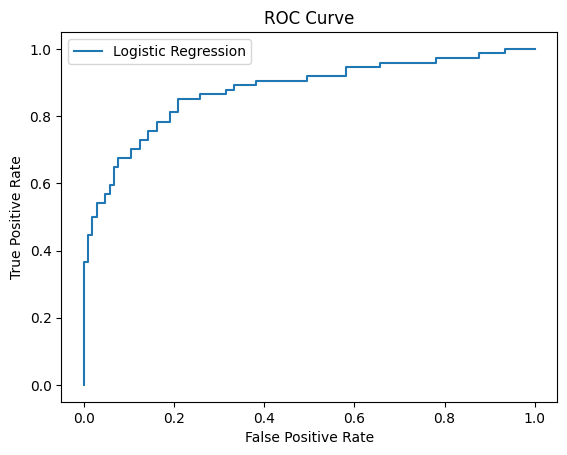

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_val_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [29]:
X_train = X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
X_test = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')


In [30]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [32]:
model.fit(X_train, y_train)
test_df['Survived'] = model.predict(X_test)
test_df['Survived']

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [34]:
print(X_train.columns)
print(X_test.columns)


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [35]:
test_df[['PassengerId', 'Survived']].head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [75]:
coefficients = model.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients,'Odds Ratio': np.exp(coefficients)})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


       Feature  Coefficient  Odds Ratio
5         Fare     0.002579    1.002582
0  PassengerId     0.000351    1.000352
2          Age    -0.031323    0.969162
7   Embarked_Q    -0.088370    0.915422
4        Parch    -0.120561    0.886423
3        SibSp    -0.288307    0.749531
8   Embarked_S    -0.405810    0.666437
1       Pclass    -0.936198    0.392116
6     Sex_male    -2.604571    0.073935


In [74]:
test_df[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)


In [41]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')
model = joblib.load('logistic_regression_model.pkl')
